In [1]:
#1. Importamos todos los datos de los canales en los que se produce aceleración (A)
#Leer datos .mat
import scipy.io 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Notacion exponencial
pd.set_option('display.float_format', '{:e}'.format)

ha1 = scipy.io.loadmat('H-A-1.mat')
ia1 = scipy.io.loadmat('I-A-1.mat')
oa1 = scipy.io.loadmat('O-A-1.mat')

sorted(ha1.keys())
sorted(ia1.keys())
sorted(oa1.keys())


xh1_1 = ha1['Channel_1'] 
xi1_1 = ia1['Channel_1']
xo1_1 = oa1['Channel_1']

n=len(xo1_1)

canalh1_1 = np.zeros(n)
canali1_1 = np.zeros(n)
canalo1_1 = np.zeros(n)




for i in range(0,n):
    canalh1_1[i] = xh1_1[i][0]     
    canali1_1[i] = xi1_1[i][0]   
    canalo1_1[i] = xo1_1[i][0]  

#Vector del tiempo
t = np.linspace(0,10,2000000)

#Dataframe con los canales 1
d1 = {'Tiempo': t, 'Canal 1 H-A-1': canalh1_1, 'Canal 1 I-A-1': canali1_1, 'Canal 1 O-A-1': canalo1_1}
canales1=pd.DataFrame(d1)
#canales1.head()

In [2]:
#Parámetros de los rodamientos
fr=1024
Nb=9
Pd=38.52
Bd=7.94
BPFO = (9/2)*(1-(Bd/Pd))*1024/60
BPFI = (9/2)*(1+(Bd/Pd))*1024/60
fs=200000

In [3]:
#Muestra kurtosis
%run ./Funciones.ipynb
muestrakurtosis(canalh1_1, 'Canal H-A-1')
muestrakurtosis(canali1_1, 'Canal I-A-1')
muestrakurtosis(canalo1_1, 'Canal O-A-1')

La kurtosis del canal Canal H-A-1 es 2.3860082424314744
La kurtosis del canal Canal I-A-1 es 11.676261178472107
La kurtosis del canal Canal O-A-1 es 2.9840987558505194


#### A destacar la kurtosis de canal con fallo de carrera interna

In [4]:
#Fast Kurtogram
%run ./Funciones.ipynb
nlevel = 4
Kwavh, Level_wh, freq_wh, ch, f_lowerh, f_upperh = Fast_Kurtogram(canalh1_1, 4, verbose=False, Fs=1, NFIR=16, fcut=0.4, opt1=1, opt2=1)
Kwavi, Level_wi, freq_wi, ci, f_loweri, f_upperi = Fast_Kurtogram(canali1_1, 4, verbose=False, Fs=1, NFIR=16, fcut=0.4, opt1=1, opt2=1)
Kwavo, Level_wo, freq_wo, co, f_lowero, f_uppero = Fast_Kurtogram(canalo1_1, 4, verbose=False, Fs=1, NFIR=16, fcut=0.4, opt1=1, opt2=1)


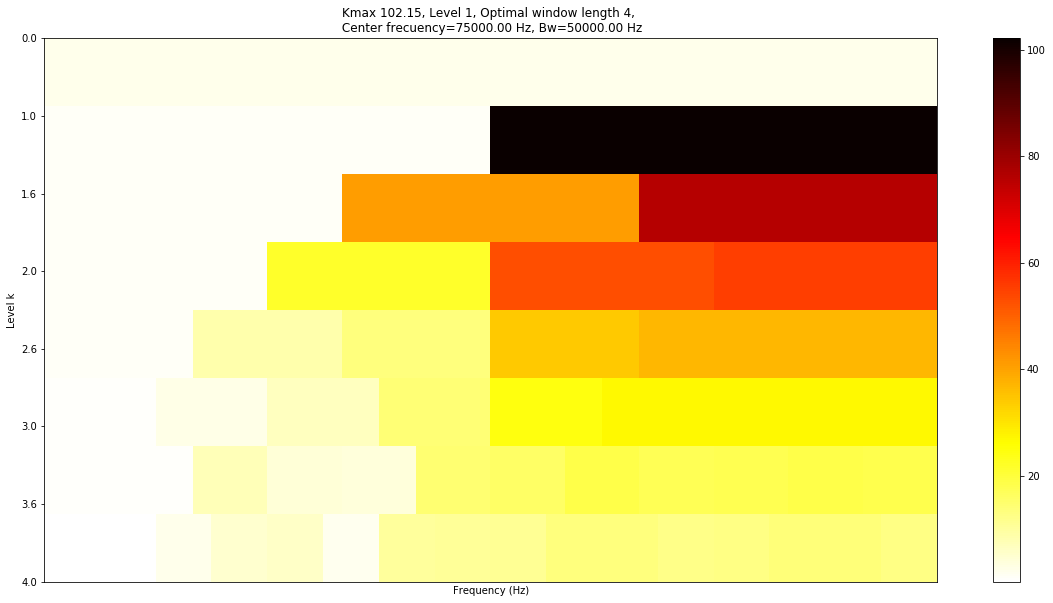

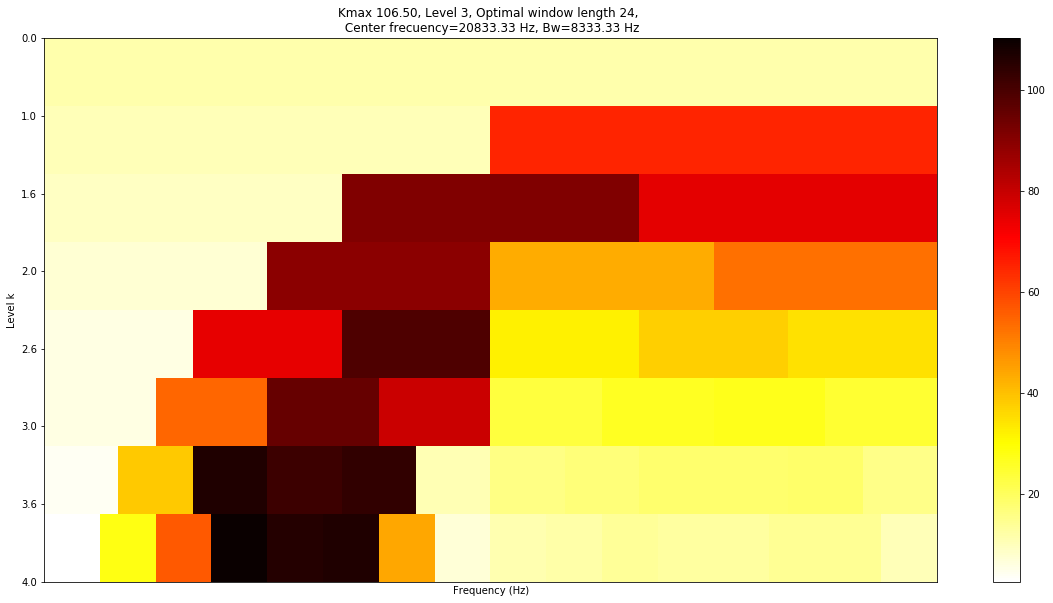

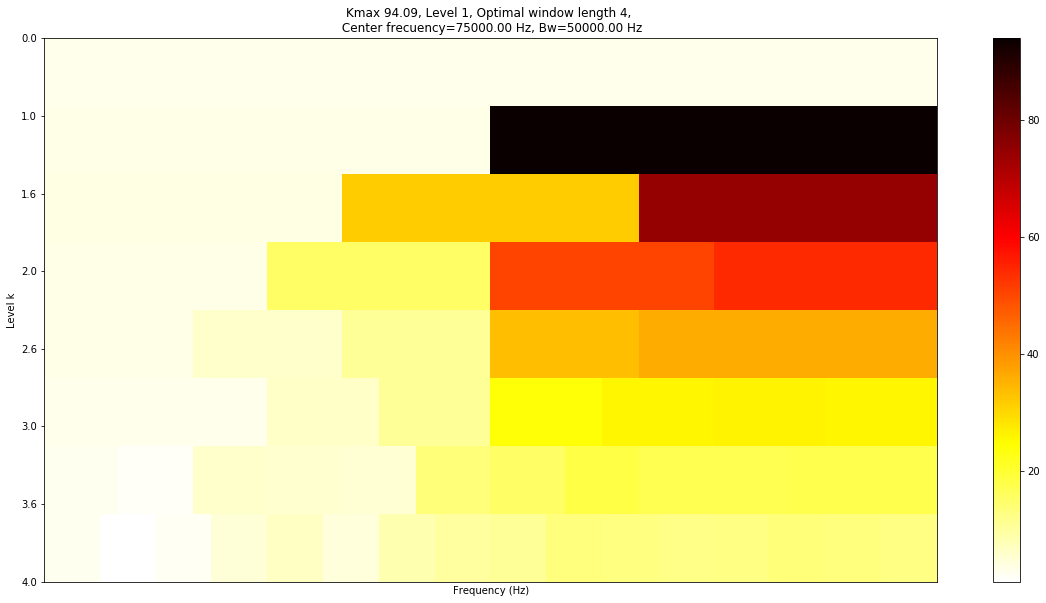

In [5]:
#Muestra el kurtograma
plotKurtogram(Kwavh, Level_wh, fs, freq_wh)
plotKurtogram(Kwavi, Level_wi, fs, freq_wi)
plotKurtogram(Kwavo, Level_wo, fs, freq_wo)

#### Es importante observar dónde se encuentran las altas frecuencias en los canales con fallo de carrera interna.
#### Sin embargo, el canal con fallo de carrera externa y el canal sano presentan el mismo centro de frecuencia y ancho de banda

In [6]:
#Cepstrum para filtrar la señal
filtradatotalh1, filtradarealh1 = filtradoCepstrum(canalh1_1, t, fs)
filtradatotali1, filtradareali1 = filtradoCepstrum(canali1_1, t, fs)
filtradatotalo1, filtradarealo1 = filtradoCepstrum(canalo1_1, t, fs)

<Figure size 2160x720 with 0 Axes>

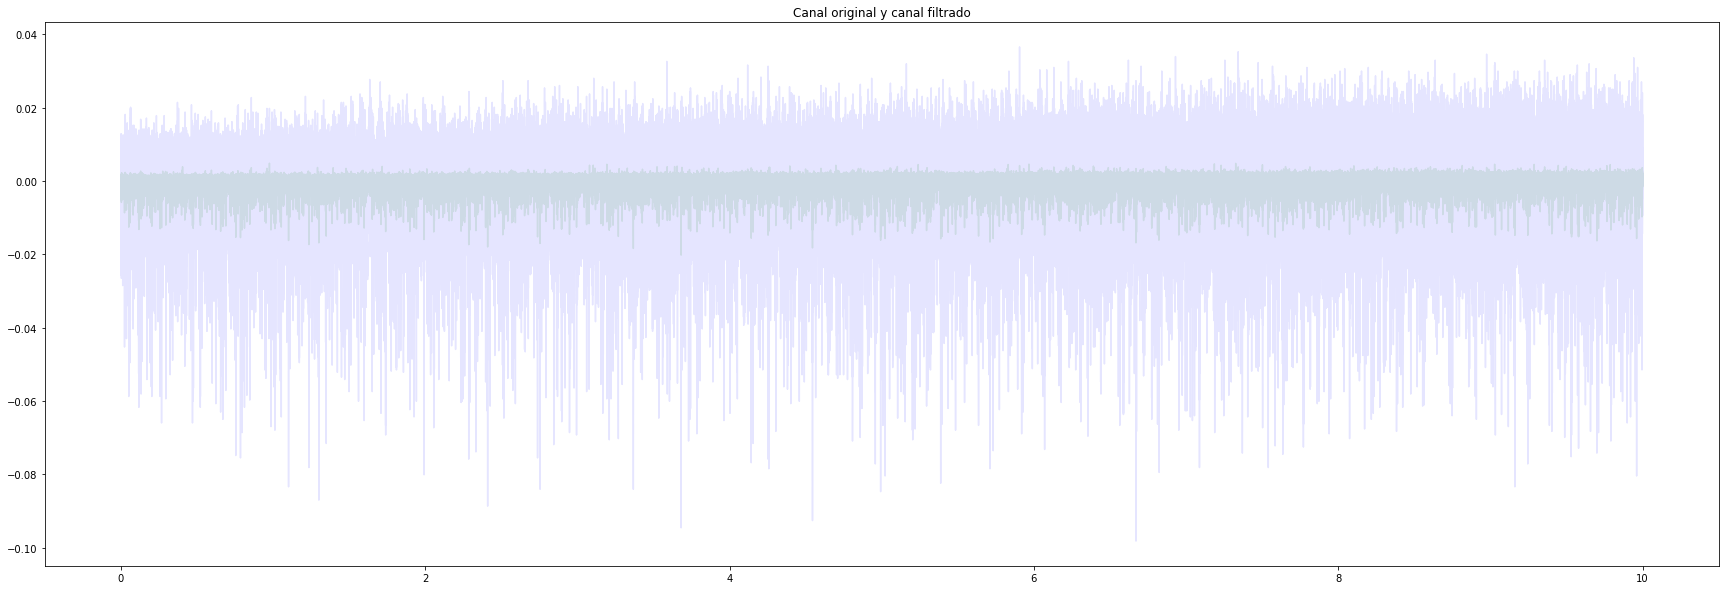

<Figure size 2160x720 with 0 Axes>

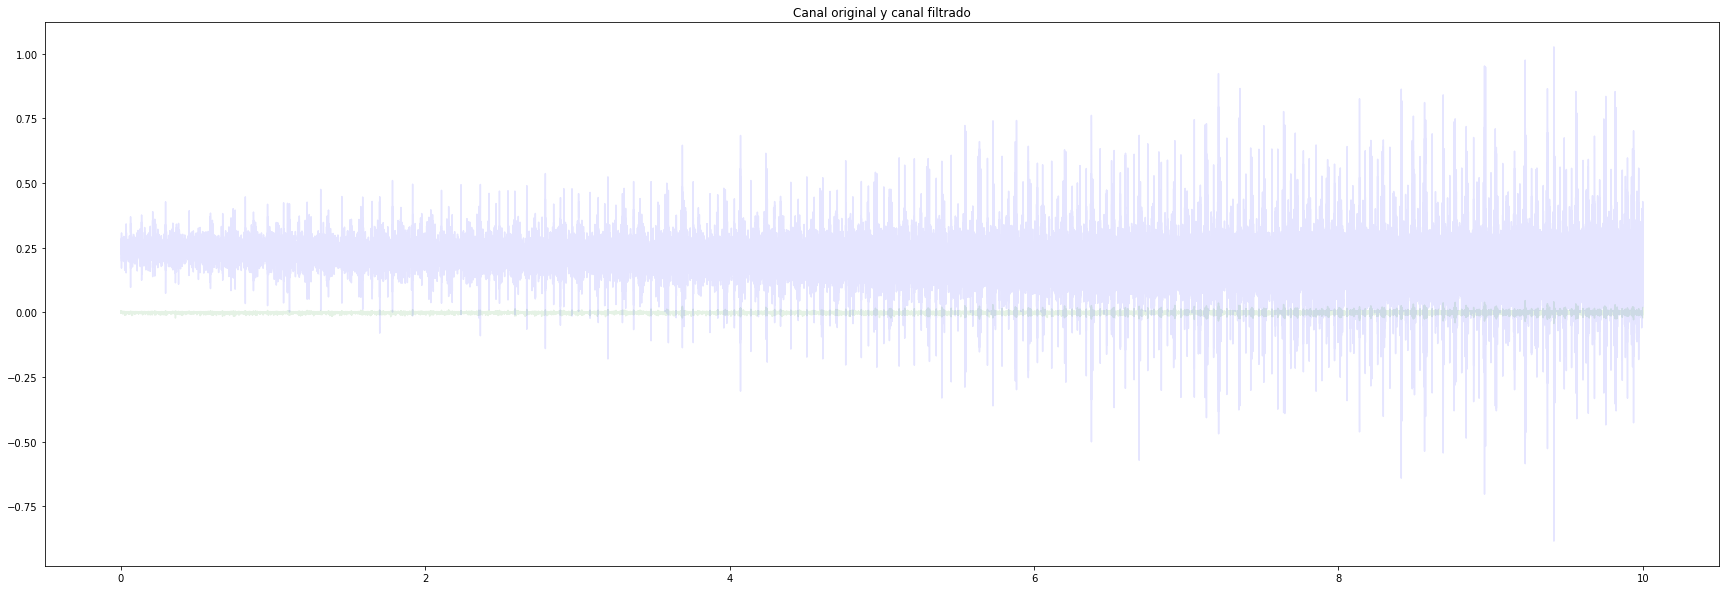

<Figure size 2160x720 with 0 Axes>

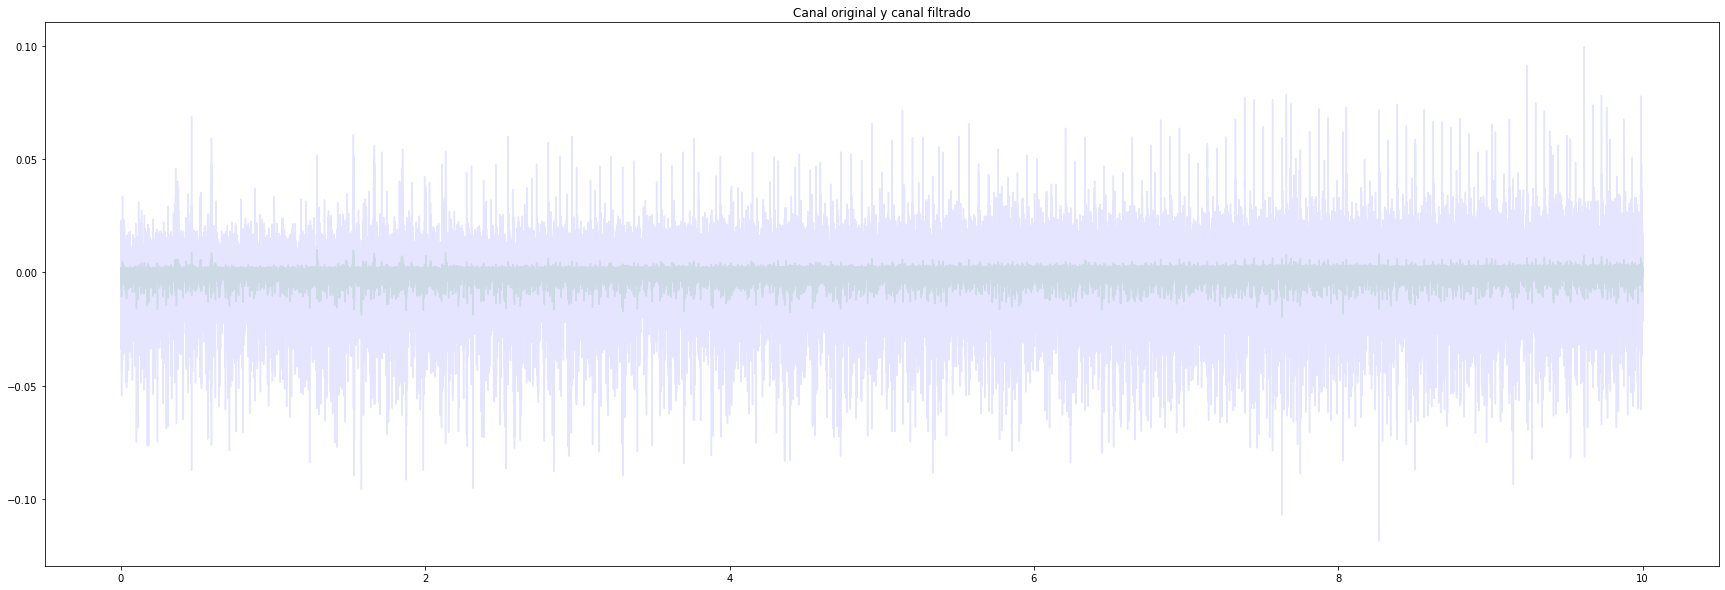

In [7]:
#Grafica señal filtrada y original
fig = plt.figure(figsize=(30,10))
muestrafiltro(canalh1_1, filtradarealh1, t, 0.1)

fig = plt.figure(figsize=(30,10))
muestrafiltro(canali1_1, filtradareali1, t, 0.1)

fig = plt.figure(figsize=(30,10))
muestrafiltro(canalo1_1, filtradarealo1, t, 0.1)

C:\Users\igoni\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


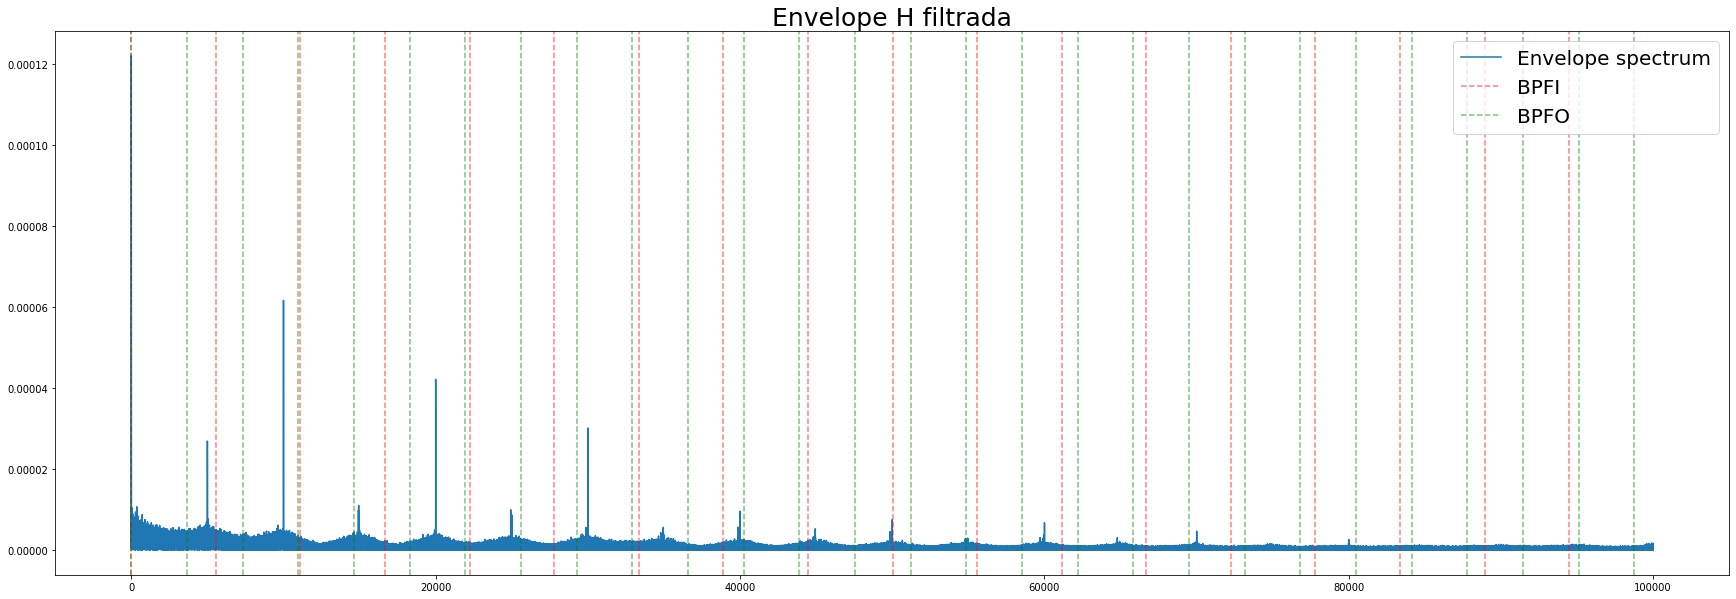

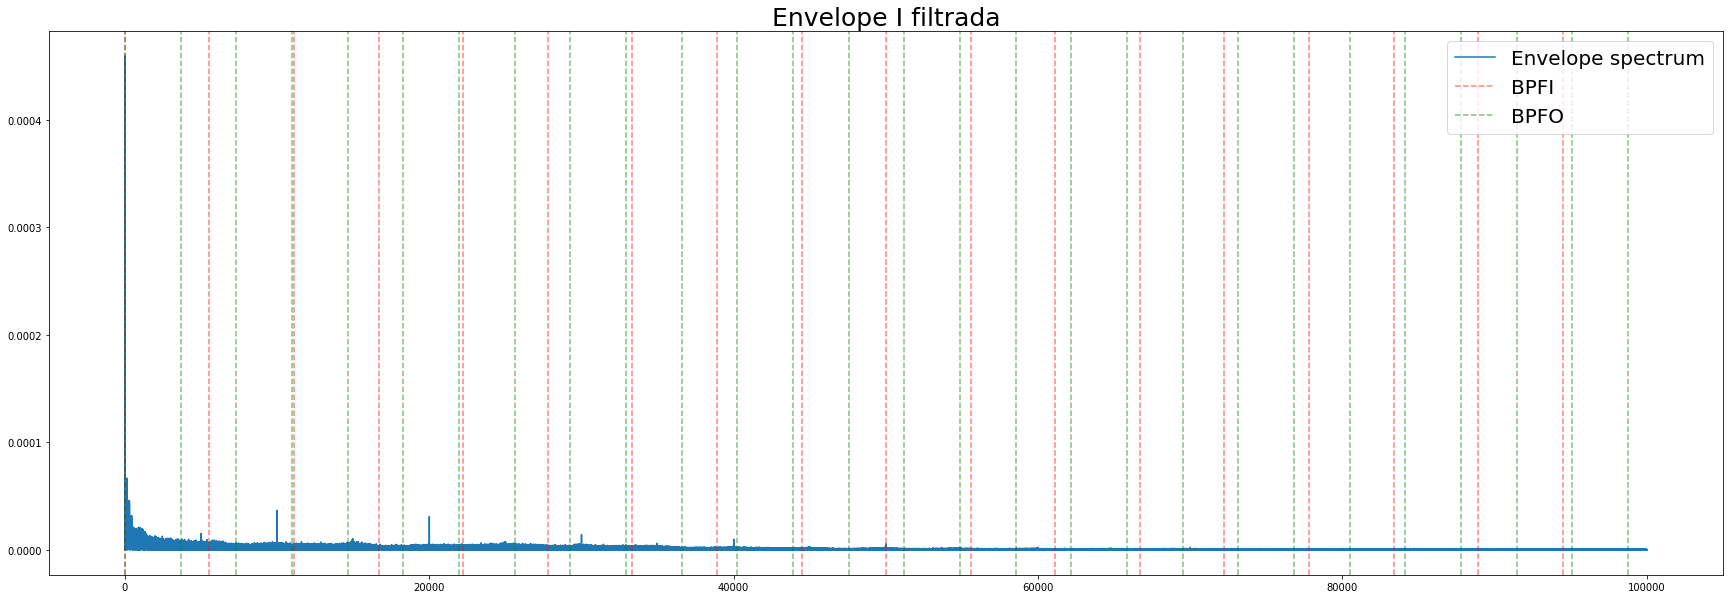

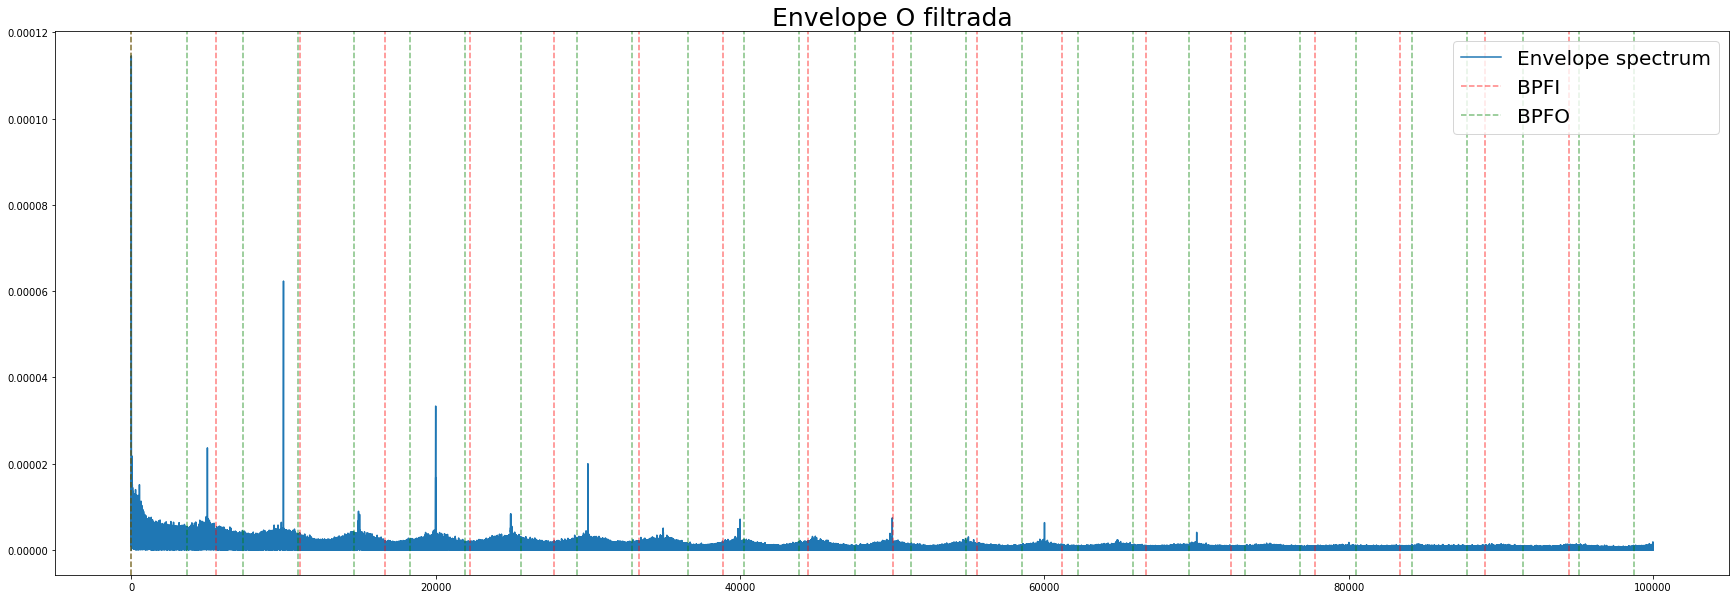

In [8]:
#4. Envelope spectrum
%run ./Funciones.ipynb
fSpech1, xSpech1, fSpecGh1, BPFI_coordsh1, BPFO_coordsh1 = envelope_spectrum(filtradarealh1, fs, BPFI*60, BPFO*60, 'Envelope H filtrada')
fSpech1, xSpeci1, fSpecGi1, BPFI_coordsi1, BPFO_coordsi1 = envelope_spectrum(filtradareali1, fs, BPFI*60, BPFO*60, 'Envelope I filtrada')
fSpech1, xSpeco1, fSpecGo1, BPFI_coordso1, BPFO_coordso1 = envelope_spectrum(filtradarealo1, fs, BPFI*60, BPFO*60, 'Envelope O filtrada')

In [9]:
#Porcentaje de armónicos de la señal filtrada
por_comunes_BPFIh1, por_comunes_BPFOh1 = por_comunes(fSpecGh1, BPFI_coordsh1, BPFO_coordsh1, fs, fr)
por_comunes_BPFIi1, por_comunes_BPFOi1 = por_comunes(fSpecGi1, BPFI_coordsi1, BPFO_coordsi1, fs, fr)
por_comunes_BPFIo1, por_comunes_BPFOo1 = por_comunes(fSpecGo1, BPFI_coordso1, BPFO_coordso1, fs, fr)

print(por_comunes_BPFIh1, por_comunes_BPFOh1)
print(por_comunes_BPFIi1, por_comunes_BPFOi1)
print(por_comunes_BPFIo1, por_comunes_BPFOo1)

33.333333333333336 32.142857142857146
11.11111111111111 10.714285714285714
16.666666666666668 28.571428571428573


#### Es posible observar que existen demasiadas coincidencias en un canal sano.
#### Sin embargo, podemos observar una mejora a la hora de detectar características en un canal con fallo de carrera externa

#### Realizamos la descomposición de la señal H

In [30]:
#5. Descomposicion en IMFS de la seña
%run ./Funciones.ipynb
u, filtradavmd = descompvmd(canalh1_1[0:50000], 2000, 2)

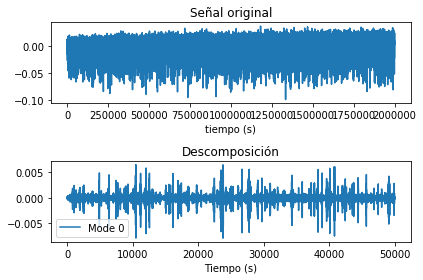

In [31]:
#Muestra la descomposición de la señal
%run ./Funciones.ipynb
muestraimfvmd(canalh1_1, u)

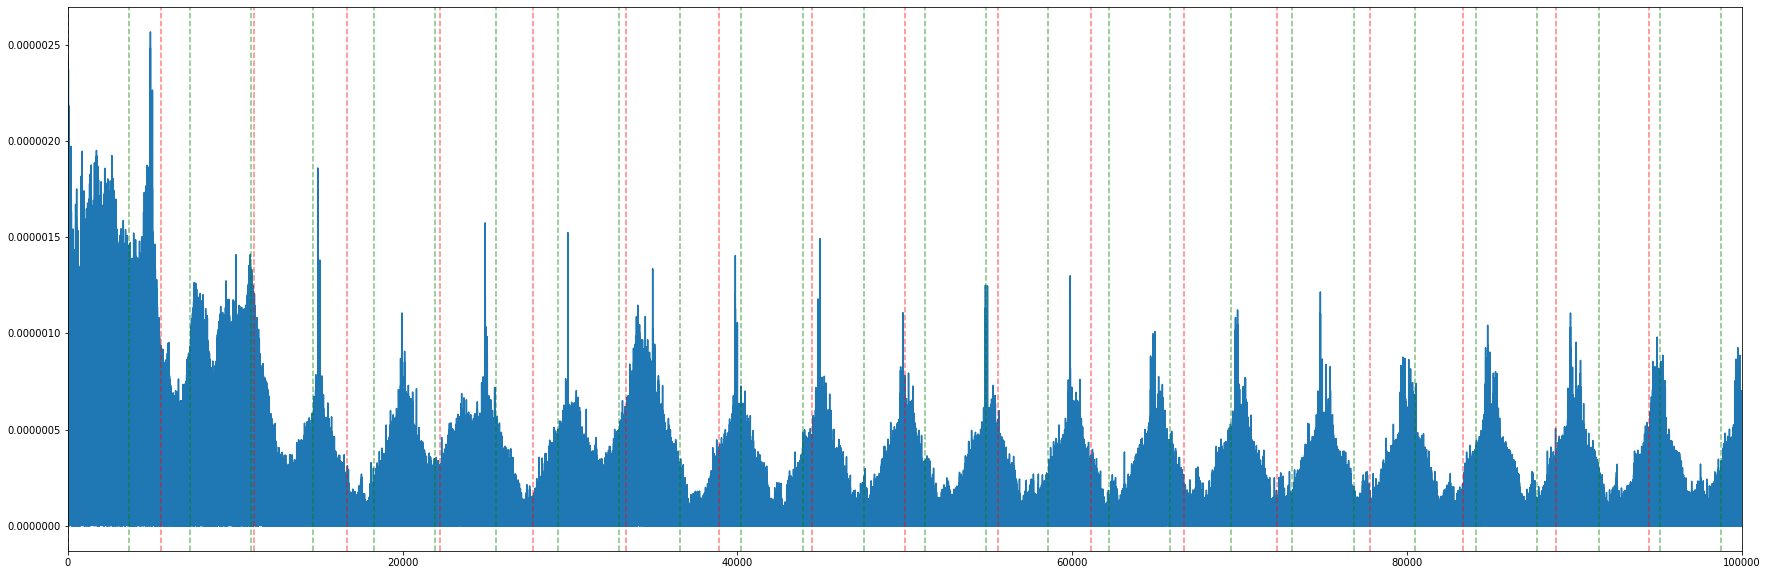

In [18]:
#6. FFT con armónicos
%run ./Funciones.ipynb
armonicosyfft(filtradarealh1, t, BPFI_coordsh1, BPFO_coordsh1)
